# Lineare Regression &ndash; iterative Lösung

### DaLI &ndash; Basismodul
#### Prof. Dr. Richard Hirsch, 21. Dezember 2021

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm
from numpy.random import default_rng
rng = default_rng(2020)

%matplotlib notebook

## Modelldaten

In [2]:
α0, α1 = (1, 0.5)           # die "echten" Werte für Achsenabschnitt und Steigung
𝜎_ε = 0.2                   # Standardabweichung der Fehler
n = 10                      # Anzahl der simulierten Datenpunkte

x = np.sort(10*rng.random(size=n))
y = α0 + α1*x + rng.normal(scale=𝜎_ε, size=n)

<IPython.core.display.Javascript object>


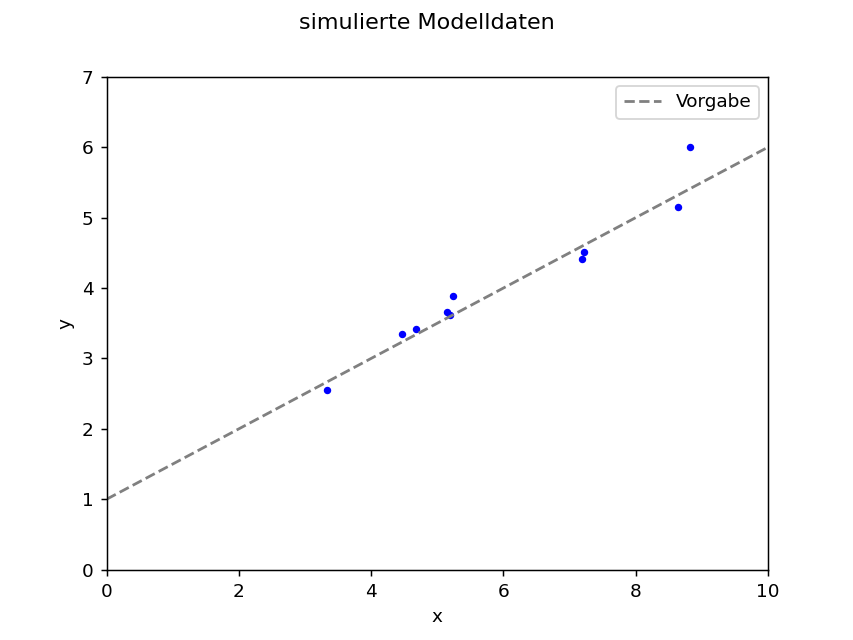

In [3]:
fig6, ax6 = plt.subplots()

fig6.suptitle("simulierte Modelldaten")
ax6.set_xlabel("x")
ax6.set_ylabel("y")
ax6.set_xlim((0, 10))
ax6.set_ylim((0, 7))

ax6.plot(x, y, ".b")
ax6.plot((0, 10), (α0, α0+10*α1), color="gray", linestyle="dashed", label="Vorgabe")
ax6.legend()
None

In [4]:
# save the data for processing with R or Excel
model_df = pd.DataFrame(zip(x, y), columns=["x", "y"])
model_df.to_csv('LinReg_data.csv')

##  Qualitätsfunktion

In [5]:
def sum_squared_distances(β0, β1):
    distances = β0 + β1*x - y
    return np.sum(distances**2)

## Iterative Lösung

Zunächst wollen wir versuchen, die optimalen Werte für $\beta_0$ und $\beta_1$ ohne höhere Mathematik zu bestimmen. Dazu probieren wir, ob der folgende *Algorithmus* zum Erfolg führt:

### Algorithmus zur iterativen Bestimmung der Geradenparameter

1. lege Startwerte für die gesuchten Parameter fest (z. B. Achsenabschnitt und Steigung der Geraden durch den ersten und letzten Datenpunkt).
2. berechne den Wert der Qualitätsfunktion für die gewählten $\beta_0$ und $\beta_1$.
3. verändere den Wert von $\beta_0$ um einen kleinen, zufälligen Betrag;
4. berechne die Qualitätsfunktion für die neuen Wert von $\beta_0$ (und dem alten $\beta_1$).
5. Wenn der neue Wert der Qualitätsfunktion kleiner (also besser) ist als der alte, behalte das neue $\beta_0$ bei, falls nicht, verwerfe es.
6. verändere die Werte von $\beta_1$ um einen kleinen, zufälligen Betrag;
7. berechne die Qualitätsfunktion für den neuen Wert von $\beta_1$.
8. Wenn der neue Wert der Qualitätsfunktion kleiner (also besser) ist als der alte, behalte das neue $\beta_1$ bei, falls nicht, verwerfe es.
9. wiederhole die Schritte 3 bis 8 solange, bis ein Abbruchskriterium erfüllt ist.

Wir brechen die Iteration ab, wenn sich der Wert von $Q(\beta_0, \beta_1)$ über 20 Wiederholungen nicht verbessert.

### Festlegen der Startwerte

In [6]:
𝛽1 = (y[-1] - y[0])/(x[-1] - x[0])
𝛽0 = y[0] - 𝛽1*x[0]

ssd = sum_squared_distances(β0, β1)

In [7]:
print(f"β0:        {β0:8.4f}")
print(f"β1:        {β1:8.4f}")
print(f"Q(β0, β1): {ssd:8.4f}")

β0:          0.4566
β1:          0.6292
Q(β0, β1):   1.1366


<IPython.core.display.Javascript object>


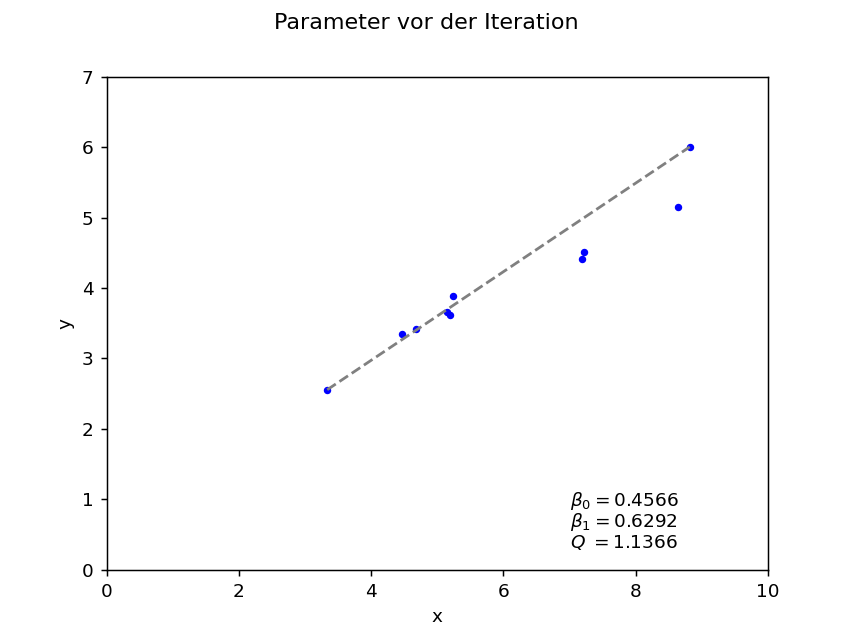

In [8]:
fig7, ax7 = plt.subplots()
fig7.suptitle("Parameter vor der Iteration")

ax7.set_xlabel("x")
ax7.set_ylabel("y")
ax7.set_xlim((0, 10))
ax7.set_ylim((0, 7))

ax7.plot(x, y, ".b")
ax7.plot(x, 𝛽0 + x*𝛽1, color="gray", linestyle="dashed")

ax7.text(7, 0.9, rf"$\beta_0 = {𝛽0:9.4f}$")
ax7.text(7, 0.6, rf"$\beta_1 = {𝛽1:9.4f}$")
ax7.text(7, 0.3, rf"$Q\; = {ssd:9.4f}$")
None

### Iteration

In [9]:
σ_rel = 0.01
max_no_changes = 20

results = [(0, β0, β1, ssd)]
counter = 0
no_changes = 0

while no_changes < max_no_changes:
    counter += 1
    no_changes += 1
    
    # try to improve β0
    β0_test = rng.normal(β0, σ_rel)
    ssd_test  = sum_squared_distances(β0_test, β1)
    if ssd_test < ssd: # success: conserve achievment
        β0 = β0_test
        ssd = ssd_test
        no_changes = 0
        
    # try to improve β1
    β1_test = rng.normal(β1, σ_rel)
    ssd_test  = sum_squared_distances(β0, β1_test)
    if ssd_test < ssd: # success: conserve achievment
        β1 = β1_test
        ssd = ssd_test
        no_changes = 0
        
    if no_changes == 0:  # if there was an improvement
        results.append( (counter, β0, β1, ssd) )
        print('+', end='')
    else:
        print('.', end='')
        
results_df = pd.DataFrame(results, columns=['iteration', 'β0', 'β1', 'ssd'])

+++++++.++++...+.++.++.++++.++++...+....+++...+.+++.+.++.+..+++++....+.+++++..+......++++++++.+..+.++...++..+..++....+.....+...++..+.++.....+++++.+++.++++...++..++++.+.++.......++....++.+++.+.+++.+.+...+.++...+.+++...+.+...+..+........+....+..++.++..+..+....+..+.......+......+....++...++++........+.........+..+.+.............+......+....................

<IPython.core.display.Javascript object>


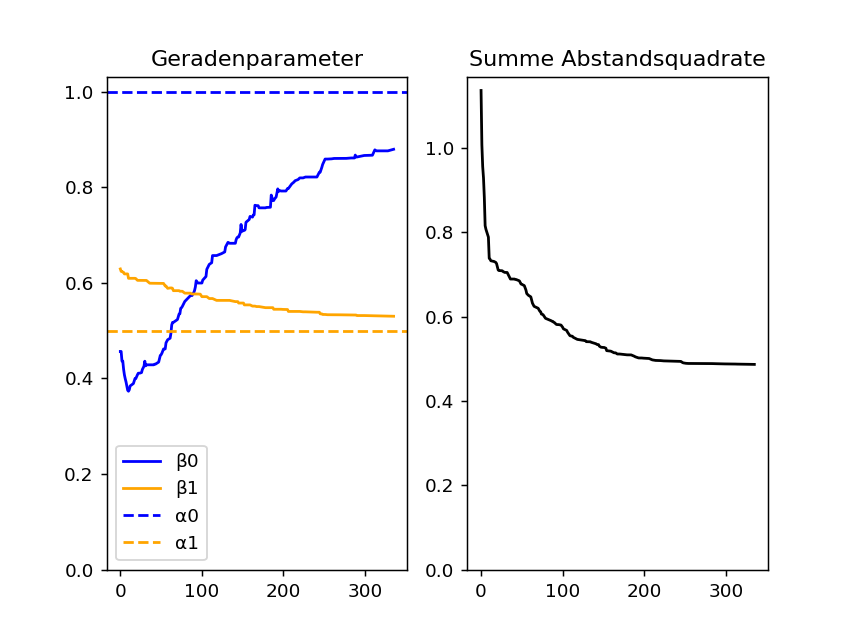

In [10]:
fig8, (ax8b, ax8q) = plt.subplots(ncols=2)

ax8b.set_title('Geradenparameter')
ax8b.plot(results_df.iteration, results_df.β0, color='blue', label='β0')
ax8b.plot(results_df.iteration, results_df.β1, color='orange', label='β1')
ax8b.axhline(α0, color='blue',   linestyle='dashed', label='α0')
ax8b.axhline(α1, color='orange', linestyle='dashed', label='α1')
ax8b.set_ylim(bottom=0)
ax8b.legend()

ax8q.set_title('Summe Abstandsquadrate')
ax8q.plot(results_df.iteration, results_df.ssd, color='black')
ax8q.set_ylim(bottom=0)
None

### Ergebnis

In [11]:
results_df

iteration        β0        β1       ssd
0            0  0.456563  0.629215  1.136579
1            1  0.456563  0.624081  1.007916
2            2  0.436481  0.624081  0.956143
3            3  0.436481  0.622723  0.928818
4            4  0.419355  0.622098  0.883018
..         ...       ...       ...       ...
137        309  0.867214  0.531229  0.487890
138        312  0.878411  0.531229  0.487621
139        314  0.876334  0.531229  0.487482
140        328  0.876334  0.530217  0.486943
141        335  0.879644  0.530217  0.486805

[142 rows x 4 columns]

### Residuen

Die Abweichungen zwischen der Modellfunktion mit den gefitteten Parametern und den Datenpunkten werden *Residuen* genannt.

Sie sollten zufällig um die Nulllinie verteilt sein. Systematische Abweichungen würden darauf hindeuten, dass das Modell nicht mächtig genug ist, die Daten zu beschreiben.

In [12]:
residuals = y - β0 - β1*x

<IPython.core.display.Javascript object>


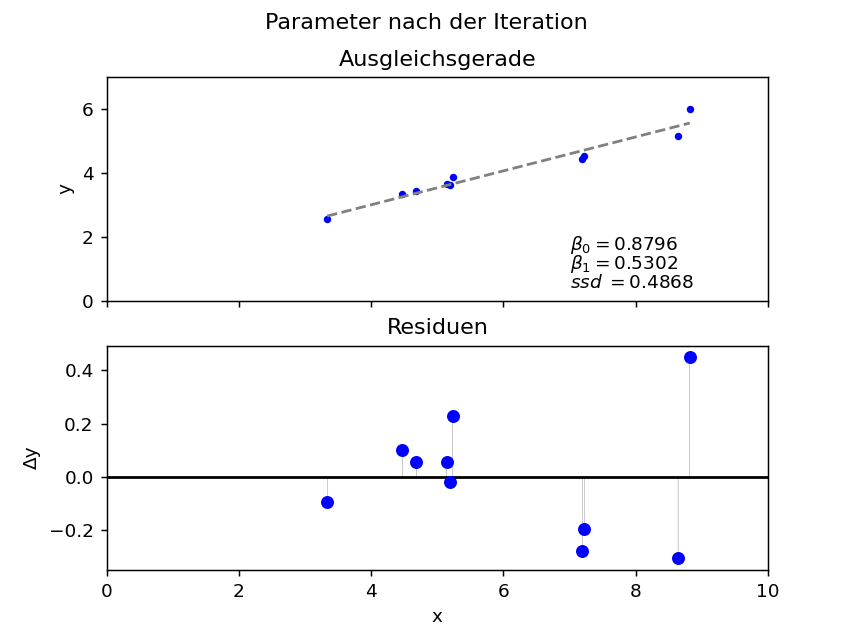

In [13]:
fig9, (ax9l, ax9r) = plt.subplots(nrows=2, sharex=True)
fig9.suptitle("Parameter nach der Iteration")

ax9l.set_title("Ausgleichsgerade")
ax9l.set_ylabel("y")
ax9l.set_xlim((0, 10))
ax9l.set_ylim((0, 7))

ax9l.plot(x, y, ".b")
ax9l.plot(x, 𝛽0 + x*𝛽1, color="gray", linestyle="dashed")

ax9l.text(7, 1.6, rf"$\beta_0 = {𝛽0:9.4f}$")
ax9l.text(7, 1.0, rf"$\beta_1 = {𝛽1:9.4f}$")
ax9l.text(7, 0.4, rf"$ssd\; = {ssd:9.4f}$")
       
ax9r.set_title("Residuen")
ax9r.set_xlabel("x")
ax9r.set_ylabel("Δy")
ax9r.set_xlim((0, 10))
ax9r.axhline(0, color="black")

for x_, r in zip(x, residuals):
    ax9r.arrow(x_, 0, 0, r, color='gray', linewidth=0.1)
ax9r.plot(x, residuals, "ob")
None

### Vergleich mit analytischer Lösung

In [14]:
def lineare_regression_analytisch(x, y):
    """linear regression on x and y, returns intercept and slope"""
    S1  = len(x)
    Sx  = np.sum(x)
    Sy  = np.sum(y)
    Sxx = np.sum(x**2)
    Sxy = np.sum(x*y)
    
    slope = (S1*Sxy - Sx*Sy)/(S1*Sxx - Sx*Sx)
    intercept = (Sy - slope*Sx)/S1
    
    return intercept, slope

β0_opt, β1_opt = lineare_regression_analytisch(x, y)
ssd_opt = sum_squared_distances(𝛽0, 𝛽1)

In [15]:
print(f"Parameter    iterativ    analytisch")
print(f"-----------------------------------")
print(f"    𝛽0       {𝛽0:8.4f}   {𝛽0_opt:8.4f}")
print(f"    𝛽1       {𝛽1:8.4f}   {𝛽1_opt:8.4f}")
print(f" Q(𝛽0, 𝛽1)   {ssd:8.4f}   {ssd_opt:8.4f}")

Parameter    iterativ    analytisch
-----------------------------------
    𝛽0         0.8796     0.9367
    𝛽1         0.5302     0.5208
 Q(𝛽0, 𝛽1)     0.4868     0.4868
